<a href="https://colab.research.google.com/github/JuanDavid23412jjjjaja/Prediction-of-liver-disease/blob/main/Proyectohepatitis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Datos hepatitis

#####Para subir la base de datos es necesario descargar el archivo CSV de este, https://www.kaggle.com/fedesoriano/hepatitis-c-dataset. 
Una vez descargado, deberá subirse. 

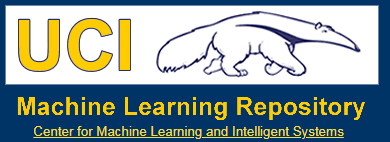

In [1]:
import pandas as pd
from google.colab import files
import numpy as np
uploaded = files.upload()

Saving HepatitisCdata.csv to HepatitisCdata (16).csv


##Adecuación de los datos.

Aquí se trabajó con dataframe de pandas para manejar los datos del archivo subido, en este caso se separaron los datos con los clasificadores mostrados en la tabla. 

|Target |	 #	|    |
|-------|:-----:|:----:|
|Blood donor	|533	|526|
|Suspect Blood Donor |	7	|7|
|Hepatitis	|24	|20|
|Fibrosis	|21	|12|
|Cirrhosis	|30	|24|
|TOTAL	|615	|589|

En la tabla están las clases y el número de muestras que hay en este dataset.
Con la instrucción ```df.drop(['Unnamed: 0'], axis = 'columns', inplace=True)``` se borraron los datos faltantes. La columna tres de la tabla muestra los valores de cada clase después de eliminarsen los datos perdidos.





In [2]:
import io
import matplotlib.pyplot as plt

data = pd.read_csv('HepatitisCdata.csv')
#Pandas
df = pd.DataFrame(data)
df = df.dropna(axis=0)
df.drop(['Unnamed: 0'], axis = 'columns', inplace=True)
#df.columns.values

## Acondicionamiento de los datos
## ---------------------------------
N = len(df)
man = df.Sex == 'm'; fem = df.Sex == 'f'
df.Sex[man] = 0; df.Sex[fem] = 1

#Target
blood_donor = df.Category == '0=Blood Donor'; # 0 = Blood Donor
suspect_blood_donor = df.Category == '0s=suspect Blood Donor'; # 1 = suspect Blood Donor
hepatitis = df.Category =='1=Hepatitis'; # 2=Hepatitis 
fibrosis = df.Category =='2=Fibrosis'; # 3=Fibrosis 
cirrhosis = df.Category=='3=Cirrhosis'; # 4=Cirrhosis
df.Category[blood_donor] = 0;
df.Category[suspect_blood_donor] = 1; df.Category[hepatitis] = 2
df.Category[fibrosis] = 3; df.Category[cirrhosis] = 4
Y = df.Category
target = Y
#print(target)

#X
df.drop(['Category'], axis = 'columns', inplace=True)
X = df
#print(X)




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: Settin

##Diagramas de correlacion

Aquí se visualizará la distribución de los descriptores. En la matriz de correlación númerica se dá que sí el número entre los descriptores es 1 la relación es directa y al ser -1 inversa.

['Age' 'Sex' 'ALB' 'ALP' 'ALT' 'AST' 'BIL' 'CHE' 'CHOL' 'CREA' 'GGT'
 'PROT']


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faf88dfafd0>,
      dtype=object)

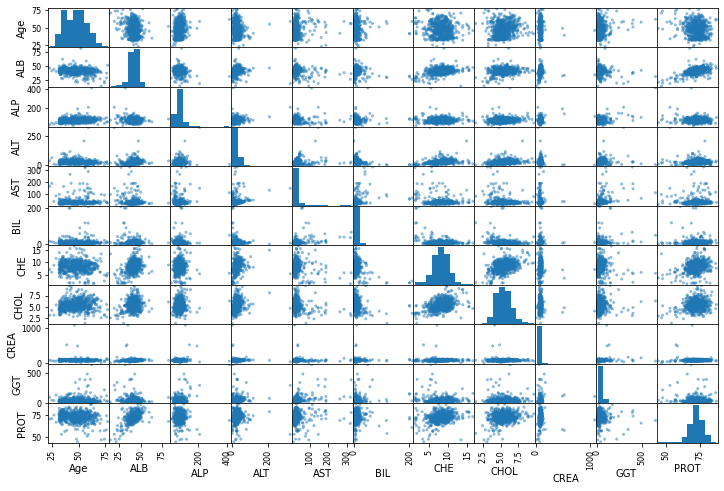

In [3]:
#Hacer diagramas de correlación
from pandas.plotting import scatter_matrix
print(df.columns.values)
atributos =df.columns.values
scatter_matrix(df[atributos],figsize=(12,8))


In [4]:
# Matriz correlación númerica
df[atributos].corr(method='pearson').round(2)

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
Age,1.00,-0.19,0.18,-0.04,0.07,0.04,-0.08,0.12,-0.03,0.14,-0.16
ALB,-0.19,1.00,-0.15,0.04,-0.18,-0.17,0.36,0.21,0.00,-0.15,0.57
ALP,0.18,-0.15,1.00,0.22,0.07,0.06,0.03,0.13,0.15,0.46,-0.06
ALT,-0.04,0.04,0.22,1.00,0.20,-0.11,0.22,0.15,-0.04,0.22,0.02
AST,0.07,-0.18,0.07,0.20,1.00,0.31,-0.20,-0.20,-0.02,0.48,0.02
BIL,0.04,-0.17,0.06,-0.11,0.31,1.00,-0.32,-0.18,0.02,0.21,-0.05
CHE,-0.08,0.36,0.03,0.22,-0.20,-0.32,1.00,0.43,-0.01,-0.10,0.31
CHOL,0.12,0.21,0.13,0.15,-0.20,-0.18,0.43,1.00,-0.05,0.01,0.25
CREA,-0.03,0.00,0.15,-0.04,-0.02,0.02,-0.01,-0.05,1.00,0.13,-0.03
GGT,0.14,-0.15,0.46,0.22,0.48,0.21,-0.10,0.01,0.13,1.00,-0.04


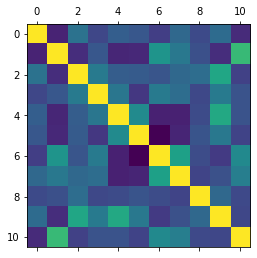

In [5]:
# Matriz correlación visual
plt.matshow(df[atributos].corr())
plt.show()

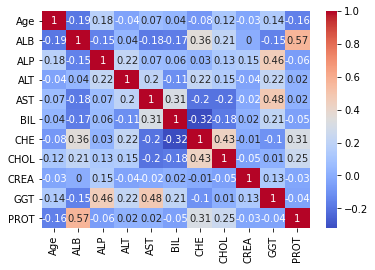

In [6]:
import seaborn as sn
corrMatrix=df[atributos].corr()
sn.heatmap( corrMatrix.round(2) , annot=True, cmap='coolwarm' )
plt.show()

##Adecuacion de los datos

In [7]:
# Matriz de descriptores
X = np.zeros([N,12])

#Edad
X[:,0] = df.Age; Edad = X[:,0].T 
#Sexo
masculino = df.Sex == 'm'; # 0 = male
femenino = df.Sex == 'f'; # 1 = female
aux = np.zeros([N,1])
aux[femenino] = 1;
X[:,1] = aux.T; Sexo = X[:,1].T 
#ALB
X[:,2] = df.ALB
ALB = X[:,2].T 
#ALP
X[:,3] = df.ALP
ALP = X[:,3].T 
#ALT
X[:,4] = df.ALT
ALT = X[:,4].T 
#AST
X[:,5] = df.AST
AST = X[:,5].T 
#BIL
X[:,6] = df.BIL
BIL = X[:,6].T 
#CHE
X[:,7] = df.CHE
CHE = X[:,7].T 
#CHOL
X[:,8] = df.CHOL
CHOL = X[:,8].T 
#CREA
X[:,9] = df.CREA
CREA = X[:,9].T 
#GGT
X[:,10] = df.GGT
GGT = X[:,10].T 
#PROT
X[:,11] = df.PROT
PROT = X[:,11].T 

#Target
#Categoria
aux = np.zeros([N,1])
aux[suspect_blood_donor] = 1; aux[hepatitis] = 2
aux[fibrosis] = 3; aux[cirrhosis] = 4
Y = np.zeros([N])
Y[:] = aux.T; Categoria = Y[:].T 




#Clasificación multiclase.

Primero se hará la clasificación para las 5 clases, se montaron clasificadores con los cuales un 70% de los datos fueron de entrenamiento y un 30% para validar y dar la precision de cada clasificador.
####**Entrenamiento de los datos**.
|X train|Y train|X test|Y test|
|:-------:|:-------:|:------:|:------:|
|412,12|412|172,12|177|

In [8]:
# Dividir los datos para entrenamiento y prueba

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
print("70% de los datos serán de entrenamiento")
print("X train: ", X_train.shape," Y train: ", y_train.shape)
print()
print("30% de los datos serán de validacion")
print("X test: ", X_test.shape, " Y test: ", y_test.shape)


70% de los datos serán de entrenamiento
X train:  (412, 12)  Y train:  (412,)

30% de los datos serán de validacion
X test:  (177, 12)  Y test:  (177,)


Aquí se creó la función del clasificador.

In [9]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

def f(y_test,clasif,model):
  # Ajuste del modelo
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  # Confusion Matrix
  print(clasif)
  matriz = confusion_matrix(y_test, y_pred)
  print(matriz)
  # Accuracy
  accuracy = accuracy_score(y_test, y_pred)
  print("Accuracy "+str(clasif)+": ", accuracy)
  # Recall
  recall = recall_score(y_test, y_pred, average=None)
  print("Recall "+str(clasif)+": ", recall)
  # Precision
  precision = precision_score(y_test, y_pred, average=None)
  print("Precision "+str(clasif)+": ", precision)
  return accuracy, precision

##Arbol de decision

In [10]:
## Módulos del Modelo: Arboles de decision 
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.metrics import f1_score

In [11]:
# modelo DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=100, max_depth=5, min_samples_leaf=5)
clasif = "Decision tree"
DTa, DTp = f(y_test,clasif,model)


Decision tree
[[152   0   2   0   0]
 [  1   0   2   0   1]
 [  1   0   2   2   0]
 [  0   0   4   1   0]
 [  2   0   2   0   5]]
Accuracy Decision tree:  0.903954802259887
Recall Decision tree:  [0.98701299 0.         0.4        0.2        0.55555556]
Precision Decision tree:  [0.97435897 0.         0.16666667 0.33333333 0.83333333]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [12]:
print("Decision tree, precision de: ",model.score(X_test, y_test))
import graphviz 
dot_data = tree.export_graphviz(model, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 

dot_data = tree.export_graphviz(model, out_file=None,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
#graph 


Decision tree, precision de:  0.903954802259887


##Afinando datos

In [13]:
# Ajuste de los parametros max_depth y min_samples_leaf

for j in range(1,40,2) :
    for i in range (1,40,2):
        print(f'Modelo con {i} max_depth, {j} min_samples_leaf')
        model = DecisionTreeClassifier( random_state=3, max_depth=i, 
                              min_samples_leaf=j)
        model.fit(X_train, y_train)
        print(f'Precisión:{ model.score(X_test,y_test) }')
        print('.....')

Modelo con 1 max_depth, 1 min_samples_leaf
Precisión:0.8983050847457628
.....
Modelo con 3 max_depth, 1 min_samples_leaf
Precisión:0.9152542372881356
.....
Modelo con 5 max_depth, 1 min_samples_leaf
Precisión:0.9096045197740112
.....
Modelo con 7 max_depth, 1 min_samples_leaf
Precisión:0.9096045197740112
.....
Modelo con 9 max_depth, 1 min_samples_leaf
Precisión:0.9096045197740112
.....
Modelo con 11 max_depth, 1 min_samples_leaf
Precisión:0.9096045197740112
.....
Modelo con 13 max_depth, 1 min_samples_leaf
Precisión:0.9096045197740112
.....
Modelo con 15 max_depth, 1 min_samples_leaf
Precisión:0.9096045197740112
.....
Modelo con 17 max_depth, 1 min_samples_leaf
Precisión:0.9096045197740112
.....
Modelo con 19 max_depth, 1 min_samples_leaf
Precisión:0.9096045197740112
.....
Modelo con 21 max_depth, 1 min_samples_leaf
Precisión:0.9096045197740112
.....
Modelo con 23 max_depth, 1 min_samples_leaf
Precisión:0.9096045197740112
.....
Modelo con 25 max_depth, 1 min_samples_leaf
Precisión:0.9

##Random Forest

In [14]:
# Módulo RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

In [15]:
# Modelo
model = RandomForestClassifier (random_state=12,
                               max_depth=9,
                               n_estimators=10)
# Predicción
clasif = "Random Forest"
RFa, RFp = f(y_test,clasif,model)

Random Forest
[[154   0   0   0   0]
 [  1   2   0   0   1]
 [  2   0   3   0   0]
 [  1   0   3   1   0]
 [  1   0   0   2   6]]
Accuracy Random Forest:  0.9378531073446328
Recall Random Forest:  [1.         0.5        0.6        0.2        0.66666667]
Precision Random Forest:  [0.96855346 1.         0.5        0.33333333 0.85714286]


Afinando

In [16]:
# RandomForestClassifier(random_state=17,max_depth=5,n_estimators=i,)
for i in range (10,100,5):
    print(f'Modelo con n_estimators = {i}')
    model=RandomForestClassifier(random_state=12,
                                 max_depth=9,
                                 n_estimators=i)
    model.fit(X_train, y_train)
    print(f'Precisión: {model.score(X_test,y_test)}')
    print('...')

Modelo con n_estimators = 10
Precisión: 0.9378531073446328
...
Modelo con n_estimators = 15
Precisión: 0.9378531073446328
...
Modelo con n_estimators = 20
Precisión: 0.9322033898305084
...
Modelo con n_estimators = 25
Precisión: 0.9265536723163842
...
Modelo con n_estimators = 30
Precisión: 0.9322033898305084
...
Modelo con n_estimators = 35
Precisión: 0.9378531073446328
...
Modelo con n_estimators = 40
Precisión: 0.9322033898305084
...
Modelo con n_estimators = 45
Precisión: 0.9322033898305084
...
Modelo con n_estimators = 50
Precisión: 0.9265536723163842
...
Modelo con n_estimators = 55
Precisión: 0.9322033898305084
...
Modelo con n_estimators = 60
Precisión: 0.9322033898305084
...
Modelo con n_estimators = 65
Precisión: 0.9322033898305084
...
Modelo con n_estimators = 70
Precisión: 0.9322033898305084
...
Modelo con n_estimators = 75
Precisión: 0.9322033898305084
...
Modelo con n_estimators = 80
Precisión: 0.9378531073446328
...
Modelo con n_estimators = 85
Precisión: 0.9378531073446

In [17]:
# Modelo Afinado
model = RandomForestClassifier (random_state=17,
                               max_depth=5,
                               n_estimators=95)
# Predicción
clasif = "Random Forest modificado"
RFa, RFp = f(y_test,clasif,model)

Random Forest modificado
[[154   0   0   0   0]
 [  3   1   0   0   0]
 [  3   0   2   0   0]
 [  2   0   3   0   0]
 [  2   0   0   0   7]]
Accuracy Random Forest modificado:  0.9265536723163842
Recall Random Forest modificado:  [1.         0.25       0.4        0.         0.77777778]
Precision Random Forest modificado:  [0.93902439 1.         0.4        0.         1.        ]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##Clasificador uno vs uno

In [18]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
model = OneVsRestClassifier(SVC()).fit(X_train, y_train)
y_pred = model.predict(X_test)
# Score
print("One vs Rest, precision de: ",model.score(X_test, y_test))
clasif = "One vs Rest"
f(y_test,clasif,model)





One vs Rest, precision de:  0.903954802259887
One vs Rest
[[154   0   0   0   0]
 [  2   0   0   0   2]
 [  3   0   0   2   0]
 [  4   0   1   0   0]
 [  2   0   0   1   6]]
Accuracy One vs Rest:  0.903954802259887
Recall One vs Rest:  [1.         0.         0.         0.         0.66666667]
Precision One vs Rest:  [0.93333333 0.         0.         0.         0.75      ]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.903954802259887,
 array([0.93333333, 0.        , 0.        , 0.        , 0.75      ]))

##Bayes

In [19]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB
model = GaussianNB()
clasif = "Gaussian Naive Bayes"
GNBa, GNBp = f(y_test,clasif,model)

Gaussian Naive Bayes
[[150   1   3   0   0]
 [  0   3   0   0   1]
 [  2   0   1   2   0]
 [  2   0   1   2   0]
 [  0   0   2   0   7]]
Accuracy Gaussian Naive Bayes:  0.9209039548022598
Recall Gaussian Naive Bayes:  [0.97402597 0.75       0.2        0.4        0.77777778]
Precision Gaussian Naive Bayes:  [0.97402597 0.75       0.14285714 0.5        0.875     ]


In [20]:
model = MultinomialNB()
clasif = "Multinomial Naive Bayes"
MNBa, MNBp = f(y_test,clasif,model)

Multinomial Naive Bayes
[[152   2   0   0   0]
 [  1   2   0   1   0]
 [  1   0   1   3   0]
 [  1   0   3   1   0]
 [  2   0   2   3   2]]
Accuracy Multinomial Naive Bayes:  0.8926553672316384
Recall Multinomial Naive Bayes:  [0.98701299 0.5        0.2        0.2        0.22222222]
Precision Multinomial Naive Bayes:  [0.96815287 0.5        0.16666667 0.125      1.        ]


In [21]:
model = ComplementNB()
clasif = "Complement Naive Bayes"
CNBa, CNBp = f(y_test,clasif,model)

Complement Naive Bayes
[[153   0   1   0   0]
 [  1   0   1   0   2]
 [  1   0   0   0   4]
 [  2   0   0   0   3]
 [  2   0   0   0   7]]
Accuracy Complement Naive Bayes:  0.903954802259887
Recall Complement Naive Bayes:  [0.99350649 0.         0.         0.         0.77777778]
Precision Complement Naive Bayes:  [0.96226415 0.         0.         0.         0.4375    ]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
model = BernoulliNB()
clasif = "Bernoulli Naive Bayes"
BNBa, BNBp = f(y_test,clasif,model)

Bernoulli Naive Bayes
[[154   0   0   0   0]
 [  4   0   0   0   0]
 [  5   0   0   0   0]
 [  5   0   0   0   0]
 [  9   0   0   0   0]]
Accuracy Bernoulli Naive Bayes:  0.8700564971751412
Recall Bernoulli Naive Bayes:  [1. 0. 0. 0. 0.]
Precision Bernoulli Naive Bayes:  [0.8700565 0.        0.        0.        0.       ]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##Comparando clasificadores

In [23]:
def compaclasi(classifiers,Accuracyc):
  dfc = pd.DataFrame()
  dfc['Classifiers'] = classifiers
  dfc['Accuracy'] = Accuracyc
  dfc['Precision Blood donor'] = pb
  dfc['Precision Suspect blood donor'] = psb
  dfc['Precision Hepatitis'] = ph
  dfc['Precision Fibrosis'] = pf
  dfc['Precision Cirrhosis'] = pc
  return dfc

classifiers = ["Gaussian Bayes", "Multinomial Bayes", "Complement Bayes", "Bernoulli Bayes","Desicion tree", "Random forest"]
Accuracyc = [GNBa, MNBa, CNBa, BNBa, DTa, RFa]
dataaa = [GNBp, MNBp, CNBp, BNBp,DTp,RFp]
pb = GNBp[0],MNBp[0],CNBp[0],BNBp[0],DTp[0],RFp[0]
psb = GNBp[1],MNBp[1],CNBp[1],BNBp[1],DTp[1],RFp[1]
ph = GNBp[2],MNBp[2],CNBp[2],BNBp[2],DTp[2],RFp[2]
pf = GNBp[3],MNBp[3],CNBp[3],BNBp[3],DTp[3],RFp[3]
pc = GNBp[4],MNBp[4],CNBp[4],BNBp[4],DTp[4],RFp[4]
dfc = compaclasi(classifiers,Accuracyc); dfc


,Classifiers,Accuracy,Precision Blood donor,Precision Suspect blood donor,Precision Hepatitis,Precision Fibrosis,Precision Cirrhosis
0,Gaussian Bayes,0.920904,0.974026,0.75,0.142857,0.500000,0.875000
1,Multinomial Bayes,0.892655,0.968153,0.50,0.166667,0.125000,1.000000
2,Complement Bayes,0.903955,0.962264,0.00,0.000000,0.000000,0.437500
3,Bernoulli Bayes,0.870056,0.870056,0.00,0.000000,0.000000,0.000000
4,Desicion tree,0.903955,0.974359,0.00,0.166667,0.333333,0.833333
5,Random forest,0.926554,0.939024,1.00,0.400000,0.000000,1.000000


##Conclusión
Al trabajar con los datos con multitarget y montando los clasificadores con el 70% de los datos para entrenar, se evidencia que a pesar de que la precisión global es alta más del 90%, la precisión por clase es pesima.

#Clasificación binaria "Sano" "enfermo"

Seguidamente, al ser tan malos los clasificadores previamente montados, se hizo un nuevo target, esta vez clasificando con "sano" o "enfermo". 
####**Target**.
|Sano|Enfermo|
|:-------:|:-------:|
|526|63|

In [24]:
#Target
#Categoria
aux = np.zeros([N,1])
aux[suspect_blood_donor] = 1; aux[hepatitis] = 1
aux[fibrosis] = 1; aux[cirrhosis] = 1
Y = np.zeros([N])
Y[:] = aux.T; Categoria = Y[:].T 
#print(Y)

###Entrenamiento de los datos

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)
print("70% de los datos serán de entrenamiento")
print("X train: ", X_train.shape," Y train: ", y_train.shape)
print()
print("30% de los datos serán de validacion")
print("X test: ", X_test.shape, " Y test: ", y_test.shape)

70% de los datos serán de entrenamiento
X train:  (412, 12)  Y train:  (412,)

30% de los datos serán de validacion
X test:  (177, 12)  Y test:  (177,)


###Clasificador Bayes

In [26]:
model = GaussianNB()
y_pred = model.fit(X_train, y_train).predict(X_test)
print("Number of mislabeled points out of a total %d points : %d"% (X_test.shape[0], (y_test != y_pred).sum()))
clasif = "Gaussian Naive Bayes"
GNBa, GNBp =f(y_test,clasif,model)

Number of mislabeled points out of a total 177 points : 8
Gaussian Naive Bayes
[[152   2]
 [  6  17]]
Accuracy Gaussian Naive Bayes:  0.9548022598870056
Recall Gaussian Naive Bayes:  [0.98701299 0.73913043]
Precision Gaussian Naive Bayes:  [0.96202532 0.89473684]


In [27]:
model = MultinomialNB()
model.fit(X_train, y_train)
MultinomialNB()
y_pred=model.predict(X_test)
clasif = "Multinomial Naive Bayes"
MNBa, MNBp = f(y_test,clasif,model)

Multinomial Naive Bayes
[[153   1]
 [  6  17]]
Accuracy Multinomial Naive Bayes:  0.96045197740113
Recall Multinomial Naive Bayes:  [0.99350649 0.73913043]
Precision Multinomial Naive Bayes:  [0.96226415 0.94444444]


In [28]:
model = ComplementNB()
model.fit(X_train, y_train)
ComplementNB()
y_pred=model.predict(X_test)
clasif = "Complement Naive Bayes"
CNBa, CNBp = f(y_test,clasif,model)

Complement Naive Bayes
[[153   1]
 [  6  17]]
Accuracy Complement Naive Bayes:  0.96045197740113
Recall Complement Naive Bayes:  [0.99350649 0.73913043]
Precision Complement Naive Bayes:  [0.96226415 0.94444444]


In [29]:
model = BernoulliNB()
model.fit(X_train, y_train)
BernoulliNB()
y_pred=model.predict(X_test)
clasif = "Bernoulli Naive Bayes"
BNBa, BNBp = f(y_test,clasif,model)

Bernoulli Naive Bayes
[[154   0]
 [ 23   0]]
Accuracy Bernoulli Naive Bayes:  0.8700564971751412
Recall Bernoulli Naive Bayes:  [1. 0.]
Precision Bernoulli Naive Bayes:  [0.8700565 0.       ]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###Decision Tree

In [30]:
# modelo DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=100, max_depth=1, min_samples_leaf=11)
# Ajuste del modelo
model.fit(X_train, y_train)
# Predicción
y_pred=model.predict(X_test)
clasif = "Decision Tree"
DTa, DTp = f(y_test,clasif,model)

Decision Tree
[[153   1]
 [  9  14]]
Accuracy Decision Tree:  0.943502824858757
Recall Decision Tree:  [0.99350649 0.60869565]
Precision Decision Tree:  [0.94444444 0.93333333]


In [31]:
# Ajuste de los parametros max_depth y min_samples_leaf

for j in range(1,40,2) :
    for i in range (1,40,2):
        print(f'Modelo con {i} max_depth, {j} min_samples_leaf')
        model = DecisionTreeClassifier( random_state=3, max_depth=i, 
                              min_samples_leaf=j)
        model.fit(X_train, y_train)
        print(f'Precisión:{ model.score(X_test,y_test) }')
        print('.....')

Modelo con 1 max_depth, 1 min_samples_leaf
Precisión:0.943502824858757
.....
Modelo con 3 max_depth, 1 min_samples_leaf
Precisión:0.9491525423728814
.....
Modelo con 5 max_depth, 1 min_samples_leaf
Precisión:0.9378531073446328
.....
Modelo con 7 max_depth, 1 min_samples_leaf
Precisión:0.943502824858757
.....
Modelo con 9 max_depth, 1 min_samples_leaf
Precisión:0.943502824858757
.....
Modelo con 11 max_depth, 1 min_samples_leaf
Precisión:0.943502824858757
.....
Modelo con 13 max_depth, 1 min_samples_leaf
Precisión:0.943502824858757
.....
Modelo con 15 max_depth, 1 min_samples_leaf
Precisión:0.943502824858757
.....
Modelo con 17 max_depth, 1 min_samples_leaf
Precisión:0.943502824858757
.....
Modelo con 19 max_depth, 1 min_samples_leaf
Precisión:0.943502824858757
.....
Modelo con 21 max_depth, 1 min_samples_leaf
Precisión:0.943502824858757
.....
Modelo con 23 max_depth, 1 min_samples_leaf
Precisión:0.943502824858757
.....
Modelo con 25 max_depth, 1 min_samples_leaf
Precisión:0.94350282485

###Random Forest

In [32]:
# Modelo
model = RandomForestClassifier (random_state=17,
                               max_depth=5,
                               n_estimators=10)
clasif = "Random Forest"
RFa, RFp = f(y_test,clasif,model)

Random Forest
[[153   1]
 [  5  18]]
Accuracy Random Forest:  0.9661016949152542
Recall Random Forest:  [0.99350649 0.7826087 ]
Precision Random Forest:  [0.96835443 0.94736842]


In [33]:
# RandomForestClassifier(random_state=17,max_depth=5,n_estimators=i,)
for i in range (10,100,5):
    print(f'Modelo con n_estimators = {i}')
    model=RandomForestClassifier(random_state=17,
                                 max_depth=5,
                                 n_estimators=i)
    model.fit(X_train, y_train)
    print(f'Precisión: {model.score(X_test,y_test)}')
    print('...')

Modelo con n_estimators = 10
Precisión: 0.9661016949152542
...
Modelo con n_estimators = 15
Precisión: 0.9661016949152542
...
Modelo con n_estimators = 20
Precisión: 0.9661016949152542
...
Modelo con n_estimators = 25
Precisión: 0.9717514124293786
...
Modelo con n_estimators = 30
Precisión: 0.9774011299435028
...
Modelo con n_estimators = 35
Precisión: 0.9774011299435028
...
Modelo con n_estimators = 40
Precisión: 0.9774011299435028
...
Modelo con n_estimators = 45
Precisión: 0.9774011299435028
...
Modelo con n_estimators = 50
Precisión: 0.9774011299435028
...
Modelo con n_estimators = 55
Precisión: 0.9774011299435028
...
Modelo con n_estimators = 60
Precisión: 0.9774011299435028
...
Modelo con n_estimators = 65
Precisión: 0.9830508474576272
...
Modelo con n_estimators = 70
Precisión: 0.9774011299435028
...
Modelo con n_estimators = 75
Precisión: 0.9830508474576272
...
Modelo con n_estimators = 80
Precisión: 0.9830508474576272
...
Modelo con n_estimators = 85
Precisión: 0.9774011299435

In [34]:
# Modelo
model = RandomForestClassifier (random_state=17,
                               max_depth=5,
                               n_estimators=80)
clasif = "Random Forest modificado"
RFa, RFp = f(y_test,clasif,model)

Random Forest modificado
[[154   0]
 [  3  20]]
Accuracy Random Forest modificado:  0.9830508474576272
Recall Random Forest modificado:  [1.         0.86956522]
Precision Random Forest modificado:  [0.98089172 1.        ]


###Logistic Regression

In [35]:
from sklearn.linear_model import SGDClassifier
model = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
# Ajuste del modelado
model.fit(X_train, y_train)
SGDClassifier(max_iter=5)
# Predicción
y_pred=model.predict(X_test)
clasif = "Logistic Regression"
f(y_test,clasif,model)


Logistic Regression
[[153   1]
 [  5  18]]
Accuracy Logistic Regression:  0.9661016949152542
Recall Logistic Regression:  [0.99350649 0.7826087 ]
Precision Logistic Regression:  [0.96835443 0.94736842]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


(0.9661016949152542, array([0.96835443, 0.94736842]))

###Smoothed hinge loss

In [36]:
model = SGDClassifier(loss="modified_huber", penalty="l2", max_iter=5)
# Ajuste del modelado
model.fit(X_train, y_train)
SGDClassifier(max_iter=5)
# Predicción
y_pred=model.predict(X_test)
clasif = "Smoothed hinge loss"
f(y_test,clasif,model)

Smoothed hinge loss
[[154   0]
 [  9  14]]
Accuracy Smoothed hinge loss:  0.9491525423728814
Recall Smoothed hinge loss:  [1.         0.60869565]
Precision Smoothed hinge loss:  [0.94478528 1.        ]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


(0.9491525423728814, array([0.94478528, 1.        ]))

###Linear Support Vector Machine

In [37]:
model = SGDClassifier(loss="hinge", penalty="l2", max_iter=15)
# Ajuste del modelado
model.fit(X_train, y_train)
SGDClassifier(max_iter=5)
# Predicción
y_pred=model.predict(X_test)
clasif = "Linear Support Vector Machine"
f(y_test,clasif,model)

Linear Support Vector Machine
[[147   7]
 [  3  20]]
Accuracy Linear Support Vector Machine:  0.943502824858757
Recall Linear Support Vector Machine:  [0.95454545 0.86956522]
Precision Linear Support Vector Machine:  [0.98       0.74074074]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


(0.943502824858757, array([0.98      , 0.74074074]))

###Comparando clasificadores

In [38]:
def compaclasibin():
  dfc = pd.DataFrame()
  dfc['Classifiers'] = classifiers
  dfc['Accuracy'] = Accuracyc
  dfc['Sano'] = sano
  dfc['Enfermo'] = enfermo
  return dfc

classifiers = ["Gaussian Bayes", "Multinomial Bayes", "Complement Bayes", "Bernoulli Bayes","Desicion tree", "Random forest"]
Accuracyc = [GNBa, MNBa, CNBa, BNBa, DTa, RFa]
dataaa = [GNBp, MNBp, CNBp, BNBp,DTp,RFp]
sano = GNBp[0],MNBp[0],CNBp[0],BNBp[0],DTp[0],RFp[0]
enfermo = GNBp[1],MNBp[1],CNBp[1],BNBp[1],DTp[1],RFp[1]
dfc = compaclasibin(); dfc

,Classifiers,Accuracy,Sano,Enfermo
0,Gaussian Bayes,0.954802,0.962025,0.894737
1,Multinomial Bayes,0.960452,0.962264,0.944444
2,Complement Bayes,0.960452,0.962264,0.944444
3,Bernoulli Bayes,0.870056,0.870056,0.000000
4,Desicion tree,0.943503,0.944444,0.933333
5,Random forest,0.983051,0.980892,1.000000


Ahora, montando un clasificador binario, la precisión por clase es altísima además de que como en el caso anterior se trabajó con 70% de los datos para entrenar los clasificadores.

#Clasificación multiclase todos los datos.

Ahora, se comparó el resultado de los clasificadores cuando estos están dados y entrenados por el 100% de los datos, en este caso, las predicciones y las precisiones serán más altas quée si se trabajan con el 70%.

In [39]:
aux = np.zeros([N,1])
aux[suspect_blood_donor] = 1; aux[hepatitis] = 2
aux[fibrosis] = 3; aux[cirrhosis] = 4
Y = np.zeros([N])
Y[:] = aux.T; Categoria = Y[:].T


def ff(Y,clasif,model):
  # Ajuste del modelo
  model.fit(X, Y)
  y_pred = model.predict(X)
  # Confusion Matrix
  print(clasif)
  matriz = confusion_matrix(Y, y_pred)
  print(matriz)
  # Accuracy
  accuracy = accuracy_score(Y, y_pred)
  print("Accuracy "+str(clasif)+": ", accuracy)
  # Recall
  recall = recall_score(Y, y_pred, average=None)
  print("Recall "+str(clasif)+": ", recall)
  # Precision
  precision = precision_score(Y, y_pred, average=None)
  print("Precision "+str(clasif)+": ", precision)
  return accuracy, precision

  

##Decision tree

In [40]:
# modelo DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=100, max_depth=5, min_samples_leaf=4)
clasif = "Decision tree"
DTa, DTp = ff(Y,clasif,model)

Decision tree
[[523   1   0   1   1]
 [  3   3   0   0   1]
 [  5   0  13   2   0]
 [  1   0   2   9   0]
 [  0   0   2   0  22]]
Accuracy Decision tree:  0.967741935483871
Recall Decision tree:  [0.99429658 0.42857143 0.65       0.75       0.91666667]
Precision Decision tree:  [0.98308271 0.75       0.76470588 0.75       0.91666667]


In [41]:
# Ajuste de los parametros max_depth y min_samples_leaf

for j in range(1,40,2) :
    for i in range (1,40,2):
        print(f'Modelo con {i} max_depth, {j} min_samples_leaf')
        model = DecisionTreeClassifier( random_state=3, max_depth=i, 
                              min_samples_leaf=j)
        model.fit(X_train, y_train)
        print(f'Precisión:{ model.score(X_test,y_test) }')
        print('.....')

Modelo con 1 max_depth, 1 min_samples_leaf
Precisión:0.943502824858757
.....
Modelo con 3 max_depth, 1 min_samples_leaf
Precisión:0.9491525423728814
.....
Modelo con 5 max_depth, 1 min_samples_leaf
Precisión:0.9378531073446328
.....
Modelo con 7 max_depth, 1 min_samples_leaf
Precisión:0.943502824858757
.....
Modelo con 9 max_depth, 1 min_samples_leaf
Precisión:0.943502824858757
.....
Modelo con 11 max_depth, 1 min_samples_leaf
Precisión:0.943502824858757
.....
Modelo con 13 max_depth, 1 min_samples_leaf
Precisión:0.943502824858757
.....
Modelo con 15 max_depth, 1 min_samples_leaf
Precisión:0.943502824858757
.....
Modelo con 17 max_depth, 1 min_samples_leaf
Precisión:0.943502824858757
.....
Modelo con 19 max_depth, 1 min_samples_leaf
Precisión:0.943502824858757
.....
Modelo con 21 max_depth, 1 min_samples_leaf
Precisión:0.943502824858757
.....
Modelo con 23 max_depth, 1 min_samples_leaf
Precisión:0.943502824858757
.....
Modelo con 25 max_depth, 1 min_samples_leaf
Precisión:0.94350282485

##Bayes

In [42]:
model = GaussianNB()
clasif = "Gaussian Naive Bayes"
GNBa, GNBp = ff(Y,clasif,model)

Gaussian Naive Bayes
[[512   7   6   1   0]
 [  0   7   0   0   0]
 [  8   0   5   5   2]
 [  3   0   1   8   0]
 [  0   0   2   1  21]]
Accuracy Gaussian Naive Bayes:  0.9388794567062818
Recall Gaussian Naive Bayes:  [0.97338403 1.         0.25       0.66666667 0.875     ]
Precision Gaussian Naive Bayes:  [0.9789675  0.5        0.35714286 0.53333333 0.91304348]


In [43]:
model = MultinomialNB()
clasif = "Multinomial Naive Bayes"
MNBa, MNBp = ff(Y,clasif,model)

Multinomial Naive Bayes
[[509   9   6   2   0]
 [  1   5   0   1   0]
 [  5   0   6   8   1]
 [  2   0   3   7   0]
 [  1   1   2   6  14]]
Accuracy Multinomial Naive Bayes:  0.9185059422750425
Recall Multinomial Naive Bayes:  [0.96768061 0.71428571 0.3        0.58333333 0.58333333]
Precision Multinomial Naive Bayes:  [0.98262548 0.33333333 0.35294118 0.29166667 0.93333333]


In [44]:
model = ComplementNB()
clasif = "Complement Naive Bayes"
CNBa, CNBp = ff(Y,clasif,model)

Complement Naive Bayes
[[514   0   0   0  12]
 [  4   1   0   0   2]
 [  8   0   0   0  12]
 [  4   0   0   0   8]
 [  4   0   0   0  20]]
Accuracy Complement Naive Bayes:  0.9083191850594228
Recall Complement Naive Bayes:  [0.97718631 0.14285714 0.         0.         0.83333333]
Precision Complement Naive Bayes:  [0.96254682 1.         0.         0.         0.37037037]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [45]:
model = BernoulliNB()
clasif = "Bernoulli Naive Bayes"
BNBa, BNBp = ff(Y,clasif,model)

Bernoulli Naive Bayes
[[526   0   0   0   0]
 [  7   0   0   0   0]
 [ 20   0   0   0   0]
 [ 12   0   0   0   0]
 [ 24   0   0   0   0]]
Accuracy Bernoulli Naive Bayes:  0.8930390492359932
Recall Bernoulli Naive Bayes:  [1. 0. 0. 0. 0.]
Precision Bernoulli Naive Bayes:  [0.89303905 0.         0.         0.         0.        ]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##Forest Random

In [46]:
# Modelo
model = RandomForestClassifier (random_state=10,
                               max_depth=8,
                               n_estimators=10)
clasif = "Random Forest"
RFa, RFp = ff(Y,clasif,model)

Random Forest
[[526   0   0   0   0]
 [  1   6   0   0   0]
 [  0   0  20   0   0]
 [  2   0   0  10   0]
 [  1   0   0   0  23]]
Accuracy Random Forest:  0.9932088285229203
Recall Random Forest:  [1.         0.85714286 1.         0.83333333 0.95833333]
Precision Random Forest:  [0.99245283 1.         1.         1.         1.        ]


In [47]:
# RandomForestClassifier(random_state=17,max_depth=5,n_estimators=i,)
for i in range (10,100,5):
    print(f'Modelo con n_estimators = {i}')
    model=RandomForestClassifier(random_state=10,
                                 max_depth=8,
                                 n_estimators=i)
    model.fit(X,Y)
    print(f'Precisión: {model.score(X,Y)}')
    print('...')

Modelo con n_estimators = 10
Precisión: 0.9932088285229203
...
Modelo con n_estimators = 15
Precisión: 0.9966044142614601
...
Modelo con n_estimators = 20
Precisión: 0.99830220713073
...
Modelo con n_estimators = 25
Precisión: 0.99830220713073
...
Modelo con n_estimators = 30
Precisión: 1.0
...
Modelo con n_estimators = 35
Precisión: 1.0
...
Modelo con n_estimators = 40
Precisión: 1.0
...
Modelo con n_estimators = 45
Precisión: 1.0
...
Modelo con n_estimators = 50
Precisión: 1.0
...
Modelo con n_estimators = 55
Precisión: 1.0
...
Modelo con n_estimators = 60
Precisión: 1.0
...
Modelo con n_estimators = 65
Precisión: 1.0
...
Modelo con n_estimators = 70
Precisión: 1.0
...
Modelo con n_estimators = 75
Precisión: 1.0
...
Modelo con n_estimators = 80
Precisión: 1.0
...
Modelo con n_estimators = 85
Precisión: 1.0
...
Modelo con n_estimators = 90
Precisión: 1.0
...
Modelo con n_estimators = 95
Precisión: 1.0
...


##Comparando clasificadores

In [48]:
classifiers = ["Gaussian Bayes", "Multinomial Bayes", "Complement Bayes", "Bernoulli Bayes","Desicion tree", "Random forest"]
Accuracyc = [GNBa, MNBa, CNBa, BNBa, DTa, RFa]
dataaa = [GNBp, MNBp, CNBp, BNBp,DTp,RFp]
pb = GNBp[0],MNBp[0],CNBp[0],BNBp[0],DTp[0],RFp[0]
psb = GNBp[1],MNBp[1],CNBp[1],BNBp[1],DTp[1],RFp[1]
ph = GNBp[2],MNBp[2],CNBp[2],BNBp[2],DTp[2],RFp[2]
pf = GNBp[3],MNBp[3],CNBp[3],BNBp[3],DTp[3],RFp[3]
pc = GNBp[4],MNBp[4],CNBp[4],BNBp[4],DTp[4],RFp[4]
dfc = compaclasi(classifiers,Accuracyc); dfc

,Classifiers,Accuracy,Precision Blood donor,Precision Suspect blood donor,Precision Hepatitis,Precision Fibrosis,Precision Cirrhosis
0,Gaussian Bayes,0.938879,0.978967,0.500000,0.357143,0.533333,0.913043
1,Multinomial Bayes,0.918506,0.982625,0.333333,0.352941,0.291667,0.933333
2,Complement Bayes,0.908319,0.962547,1.000000,0.000000,0.000000,0.370370
3,Bernoulli Bayes,0.893039,0.893039,0.000000,0.000000,0.000000,0.000000
4,Desicion tree,0.967742,0.983083,0.750000,0.764706,0.750000,0.916667
5,Random forest,0.993209,0.992453,1.000000,1.000000,1.000000,1.000000


Como era de esperarse, al los clasificadores ser entrenados con todos los datos se logró obtener una precisión aproximadamente del 100% con Random Forest.

#Clasificación binaria "Sano" "Enfermo" con todos los datos

Ahora los clasificadores tendrán como target sano o enfermo, pero esta vez con el 100% de los datos para estos ser entrenados.

##Target

In [49]:
#Target
#Categoria
aux = np.zeros([N,1])
aux[suspect_blood_donor] = 1; aux[hepatitis] = 1
aux[fibrosis] = 1; aux[cirrhosis] = 1
Y = np.zeros([N])
Y[:] = aux.T; Categoria = Y[:].T 
#print(Y)

##Bayes

In [50]:
model = GaussianNB()
clasif = "Gaussian Naive Bayes"
GNBa, GNBp = ff(Y,clasif,model)

Gaussian Naive Bayes
[[512  14]
 [ 16  47]]
Accuracy Gaussian Naive Bayes:  0.9490662139219015
Recall Gaussian Naive Bayes:  [0.97338403 0.74603175]
Precision Gaussian Naive Bayes:  [0.96969697 0.7704918 ]


In [51]:
model = MultinomialNB()
clasif = "Multinomial Naive Bayes"
MNBa, MNBp = ff(Y,clasif,model)

Multinomial Naive Bayes
[[512  14]
 [ 18  45]]
Accuracy Multinomial Naive Bayes:  0.9456706281833617
Recall Multinomial Naive Bayes:  [0.97338403 0.71428571]
Precision Multinomial Naive Bayes:  [0.96603774 0.76271186]


In [52]:
model = ComplementNB()
clasif = "Complement Naive Bayes"
CNBa, CNBp = ff(Y,clasif,model)

Complement Naive Bayes
[[511  15]
 [ 17  46]]
Accuracy Complement Naive Bayes:  0.9456706281833617
Recall Complement Naive Bayes:  [0.97148289 0.73015873]
Precision Complement Naive Bayes:  [0.96780303 0.75409836]


In [53]:
model = BernoulliNB()
clasif = "Bernoulli Naive Bayes"
BNBa, BNBp = ff(Y,clasif,model)

Bernoulli Naive Bayes
[[526   0]
 [ 63   0]]
Accuracy Bernoulli Naive Bayes:  0.8930390492359932
Recall Bernoulli Naive Bayes:  [1. 0.]
Precision Bernoulli Naive Bayes:  [0.89303905 0.        ]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##Desicion tree

In [54]:
# modelo DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=100, max_depth=10, min_samples_leaf=3)
clasif = "Decision tree"
DTa, DTp = ff(Y,clasif,model)

Decision tree
[[523   3]
 [  4  59]]
Accuracy Decision tree:  0.9881154499151104
Recall Decision tree:  [0.99429658 0.93650794]
Precision Decision tree:  [0.99240987 0.9516129 ]


In [55]:
# Ajuste de los parametros max_depth y min_samples_leaf

for j in range(1,40,2) :
    for i in range (1,40,2):
        print(f'Modelo con {i} max_depth, {j} min_samples_leaf')
        model = DecisionTreeClassifier( random_state=100, max_depth=i, 
                              min_samples_leaf=j)
        model.fit(X_train, y_train)
        print(f'Precisión:{ model.score(X_test,y_test) }')
        print('.....')

Modelo con 1 max_depth, 1 min_samples_leaf
Precisión:0.943502824858757
.....
Modelo con 3 max_depth, 1 min_samples_leaf
Precisión:0.9491525423728814
.....
Modelo con 5 max_depth, 1 min_samples_leaf
Precisión:0.9378531073446328
.....
Modelo con 7 max_depth, 1 min_samples_leaf
Precisión:0.9322033898305084
.....
Modelo con 9 max_depth, 1 min_samples_leaf
Precisión:0.9322033898305084
.....
Modelo con 11 max_depth, 1 min_samples_leaf
Precisión:0.9322033898305084
.....
Modelo con 13 max_depth, 1 min_samples_leaf
Precisión:0.9322033898305084
.....
Modelo con 15 max_depth, 1 min_samples_leaf
Precisión:0.9322033898305084
.....
Modelo con 17 max_depth, 1 min_samples_leaf
Precisión:0.9322033898305084
.....
Modelo con 19 max_depth, 1 min_samples_leaf
Precisión:0.9322033898305084
.....
Modelo con 21 max_depth, 1 min_samples_leaf
Precisión:0.9322033898305084
.....
Modelo con 23 max_depth, 1 min_samples_leaf
Precisión:0.9322033898305084
.....
Modelo con 25 max_depth, 1 min_samples_leaf
Precisión:0.93

##Random Forest

In [56]:
# Modelo
model = RandomForestClassifier (random_state=10,
                               max_depth=8,
                               n_estimators=10)
clasif = "Random Forest"
RFa, RFp = ff(Y,clasif,model)

Random Forest
[[526   0]
 [  1  62]]
Accuracy Random Forest:  0.99830220713073
Recall Random Forest:  [1.         0.98412698]
Precision Random Forest:  [0.99810247 1.        ]


In [57]:
# RandomForestClassifier(random_state=17,max_depth=5,n_estimators=i,)
for i in range (10,100,5):
    print(f'Modelo con n_estimators = {i}')
    model=RandomForestClassifier(random_state=10,
                                 max_depth=8,
                                 n_estimators=i)
    model.fit(X,Y)
    print(f'Precisión: {model.score(X,Y)}')
    print('...')

Modelo con n_estimators = 10
Precisión: 0.99830220713073
...
Modelo con n_estimators = 15
Precisión: 1.0
...
Modelo con n_estimators = 20
Precisión: 1.0
...
Modelo con n_estimators = 25
Precisión: 1.0
...
Modelo con n_estimators = 30
Precisión: 1.0
...
Modelo con n_estimators = 35
Precisión: 1.0
...
Modelo con n_estimators = 40
Precisión: 1.0
...
Modelo con n_estimators = 45
Precisión: 1.0
...
Modelo con n_estimators = 50
Precisión: 1.0
...
Modelo con n_estimators = 55
Precisión: 1.0
...
Modelo con n_estimators = 60
Precisión: 1.0
...
Modelo con n_estimators = 65
Precisión: 1.0
...
Modelo con n_estimators = 70
Precisión: 1.0
...
Modelo con n_estimators = 75
Precisión: 1.0
...
Modelo con n_estimators = 80
Precisión: 1.0
...
Modelo con n_estimators = 85
Precisión: 1.0
...
Modelo con n_estimators = 90
Precisión: 1.0
...
Modelo con n_estimators = 95
Precisión: 1.0
...


###Comparando clasificadores

In [58]:
classifiers = ["Gaussian Bayes", "Multinomial Bayes", "Complement Bayes", "Bernoulli Bayes","Desicion tree", "Random forest"]
Accuracyc = [GNBa, MNBa, CNBa, BNBa, DTa, RFa]
dataaa = [GNBp, MNBp, CNBp, BNBp,DTp,RFp]
sano = GNBp[0],MNBp[0],CNBp[0],BNBp[0],DTp[0],RFp[0]
enfermo = GNBp[1],MNBp[1],CNBp[1],BNBp[1],DTp[1],RFp[1]
dfc = compaclasibin(); dfc

,Classifiers,Accuracy,Sano,Enfermo
0,Gaussian Bayes,0.949066,0.969697,0.770492
1,Multinomial Bayes,0.945671,0.966038,0.762712
2,Complement Bayes,0.945671,0.967803,0.754098
3,Bernoulli Bayes,0.893039,0.893039,0.000000
4,Desicion tree,0.988115,0.992410,0.951613
5,Random forest,0.998302,0.998102,1.000000


Como era de esperarse, Random forest tambien dió la mejor predicción en el modelo binario.

#Clasificandor Binario multiple

##Adecuacion de datos X

In [126]:
def fff(Y,clasif,model):
  # Ajuste del modelo
  model.fit(X, Y)
  y_pred = model.predict(X)
  # Confusion Matrix
  print(clasif)
  return y_pred

def ff(X_train,X_test,y_train,y_test,clasif,model):
  # Ajuste del modelo
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  # Confusion Matrix
  print(clasif)
  matriz_dt = confusion_matrix(y_test, y_pred)
  print(matriz_dt)
  # Accuracy
  accuracy_dt = accuracy_score(y_test, y_pred)
  print("Accuracy "+str(clasif)+": ", accuracy_dt)
  # Recall
  recall_dt = recall_score(y_test, y_pred, average=None)
  print("Recall "+str(clasif)+": ", recall_dt)
  # Precision
  precision_dt = precision_score(y_test, y_pred, average=None)
  print("Precision "+str(clasif)+": ", precision_dt)
  

  

def predic(X,Y,clasif,model):
  y_pred = fff(Y,clasif,model)
  no = []; si = []; tar = []; y_pred2 = y_pred
  for i in range(len(y_pred)):
    if y_pred[i] == 0:
      #print(i,"La preddiccion fue sano")
      no.append(i); tar.append(0)
    else:
      si.append(i); tar.append(1)
  
  if len(no)>0:
    #Target
    #Categoria
    aux = np.zeros([N,1])
    aux[suspect_blood_donor] = 1; aux[hepatitis] = 2
    aux[fibrosis] = 3; aux[cirrhosis] = 4
    y_pred = np.zeros([N])
    y_pred[:] = aux.T; Categoria = y_pred[:].T 
    y_pred=y_pred.T
    y_pred = np.delete(y_pred, no,axis=None)
    X= np.delete(X, no, axis=0)
    X_train, X_test, y_train, y_test = train_test_split(X, y_pred, test_size = 0.2, random_state = 0)
    print("70% de los datos serán de entrenamiento")
    print("X train: ", X_train.shape," Y train: ", y_train.shape)
    print()
    print("30% de los datos serán de validacion")
    print("X test: ", X_test.shape, " Y test: ", y_test.shape)

    ff(X_train,X_test,y_train,y_test,clasif,model)

# Modelo
model = RandomForestClassifier (random_state=100,
                               max_depth=4,
                               n_estimators=6)
clasif = "Random Forest"
predic(X,Y,clasif,model)



Random Forest
70% de los datos serán de entrenamiento
X train:  (42, 12)  Y train:  (42,)

30% de los datos serán de validacion
X test:  (11, 12)  Y test:  (11,)
Random Forest
[[2 0 0 0]
 [0 1 0 0]
 [0 1 1 0]
 [0 0 0 6]]
Accuracy Random Forest:  0.9090909090909091
Recall Random Forest:  [1.  1.  0.5 1. ]
Precision Random Forest:  [1.  0.5 1.  1. ]


#**Conclusión**

Los resultado fiables fueron para la predicción de si un paciente está enfermo o no debido a sus pruebas de la función hepática. 

Para clasificar el tipo de enfermedad hepática se necesita una mayor indagación a los datos, así como a sus descriptores y hacer una mayor adquisición de datos.
